In [8]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray

# Memuat dan Konversi Data

Mmemuat Citra

(300, 451, 3)


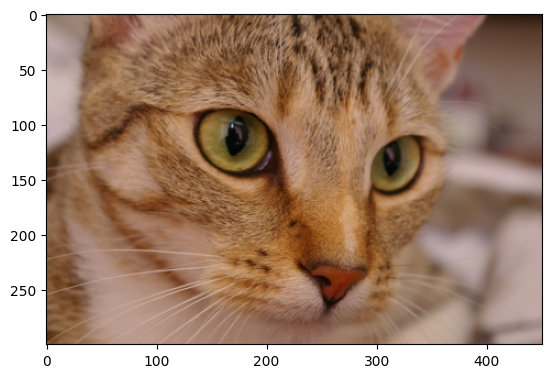

In [9]:
original = data.cat()
print(original.shape)

plt.imshow(original)

catImage shape: (300, 451, 3)
loadImage shape: (1020, 1910, 4)


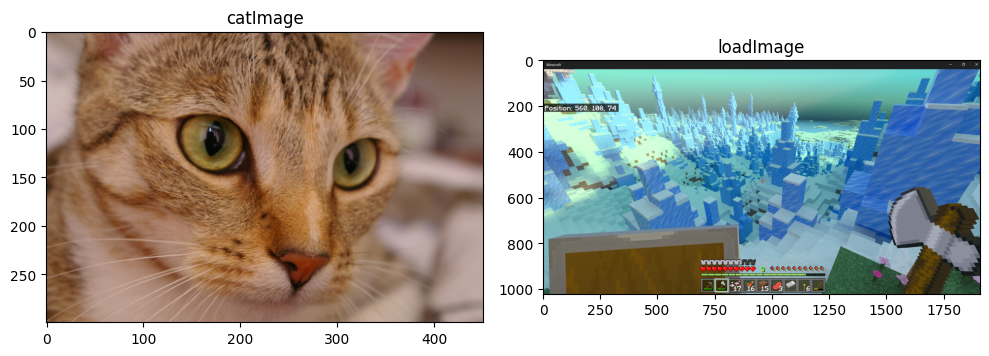

In [10]:
catImage = data.cat()
loadImage = imread(fname="spikes.png") # Load an image from a file
print('catImage shape:', catImage.shape)
print('loadImage shape:', loadImage.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(catImage)
ax[0].set_title('catImage')
ax[1].imshow(loadImage)
ax[1].set_title('loadImage')

fig.tight_layout()
plt.show()

Convert RGB to Grayscale

catImageGray shape: (300, 451)
loadImageGray shape: (1020, 1910)


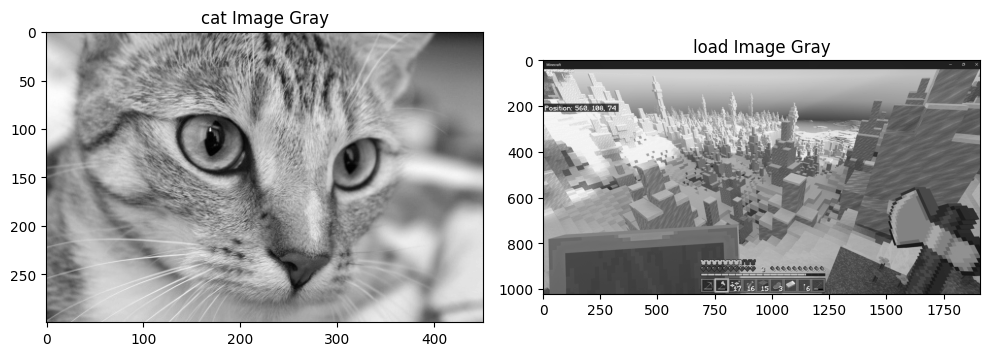

In [11]:
catImageGray = rgb2gray(catImage)

# remove the alpha channel if it exists
loadImageRGB = loadImage[:, :, :3]
loadImageGray = rgb2gray(loadImageRGB)

print('catImageGray shape:', catImageGray.shape)
print('loadImageGray shape:', loadImageGray.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(catImageGray, cmap=plt.cm.gray)
ax[0].set_title('cat Image Gray')
ax[1].imshow(loadImageGray, cmap=plt.cm.gray)
ax[1].set_title('load Image Gray')

fig.tight_layout()
plt.show()

Convert Grayscale to Binary

catImageBinary shape: (300, 451)
loadImageBinary shape: (1020, 1910)


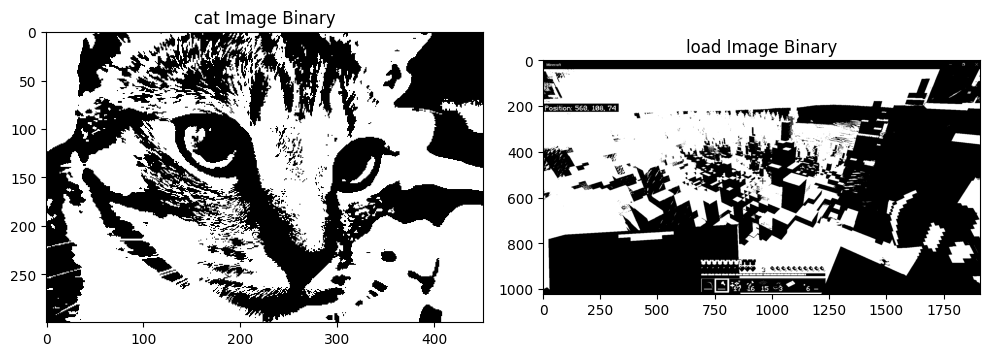

In [13]:
from skimage.filters import threshold_otsu

# Apply Otsu's thresholding method to the grayscale image
catImageThreshold = threshold_otsu(catImageGray)
loadImageThreshold = threshold_otsu(loadImageGray)

# Convert the grayscale image to binary using the threshold
catImageBinary = catImageGray > catImageThreshold
loadImageBinary = loadImageGray > loadImageThreshold

print('catImageBinary shape:', catImageBinary.shape)
print('loadImageBinary shape:', loadImageBinary.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(catImageBinary, cmap=plt.cm.gray)
ax[0].set_title('cat Image Binary')
ax[1].imshow(loadImageBinary, cmap=plt.cm.gray)
ax[1].set_title('load Image Binary')

fig.tight_layout()
plt.show()

# Histogram Citra

Grayscale Histogram

grayImage shape: (512, 512)
rgbImage shape: (512, 512, 3)


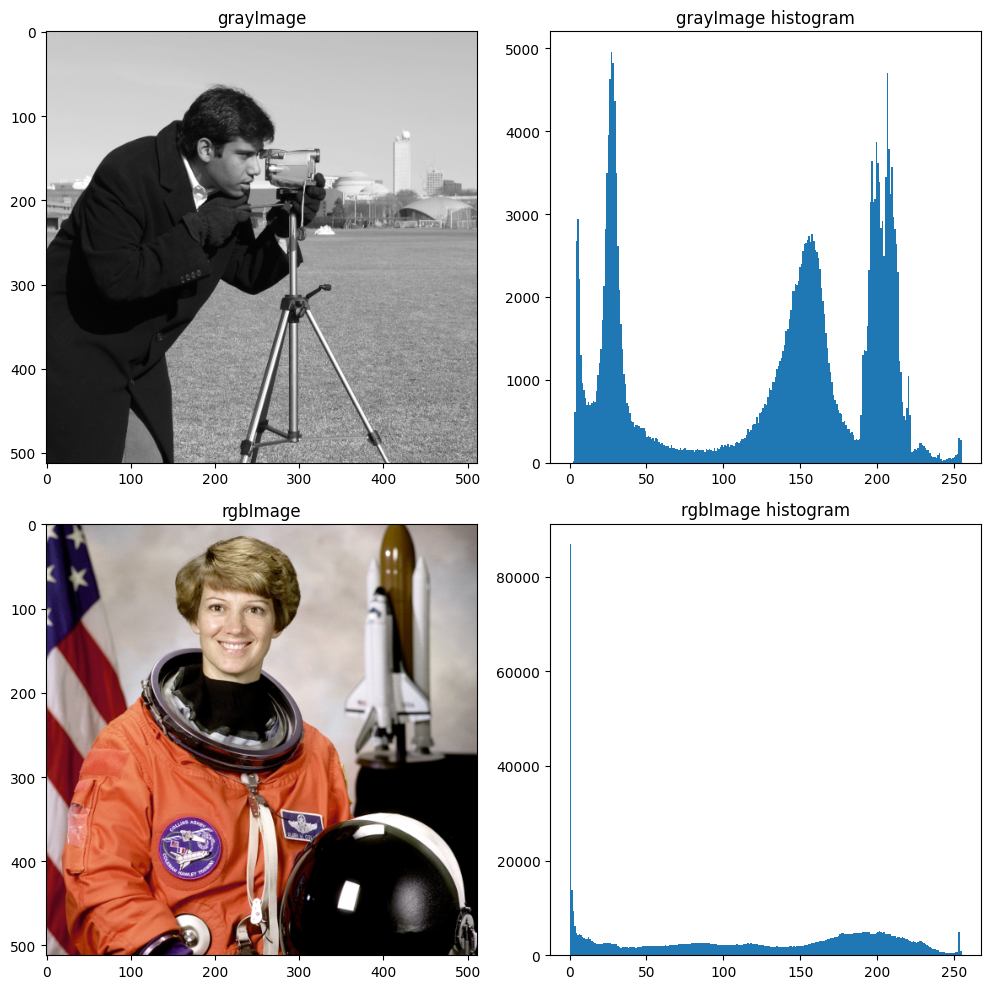

In [15]:
from skimage.filters import threshold_minimum
from skimage.filters import threshold_mean

grayImage = data.camera()
print('grayImage shape:', grayImage.shape)

rgbImage = data.astronaut()
print('rgbImage shape:', rgbImage.shape)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(grayImage, cmap=plt.cm.gray)
ax[0].set_title('grayImage')
ax[1].hist(grayImage.ravel(), bins=256)
ax[1].set_title('grayImage histogram')
ax[2].imshow(rgbImage)
ax[2].set_title('rgbImage')
ax[3].hist(rgbImage.ravel(), bins=256)
ax[3].set_title('rgbImage histogram')

fig.tight_layout()

RGB Histogram

red shape: (512, 512)
green shape: (512, 512)
blue shape: (512, 512)


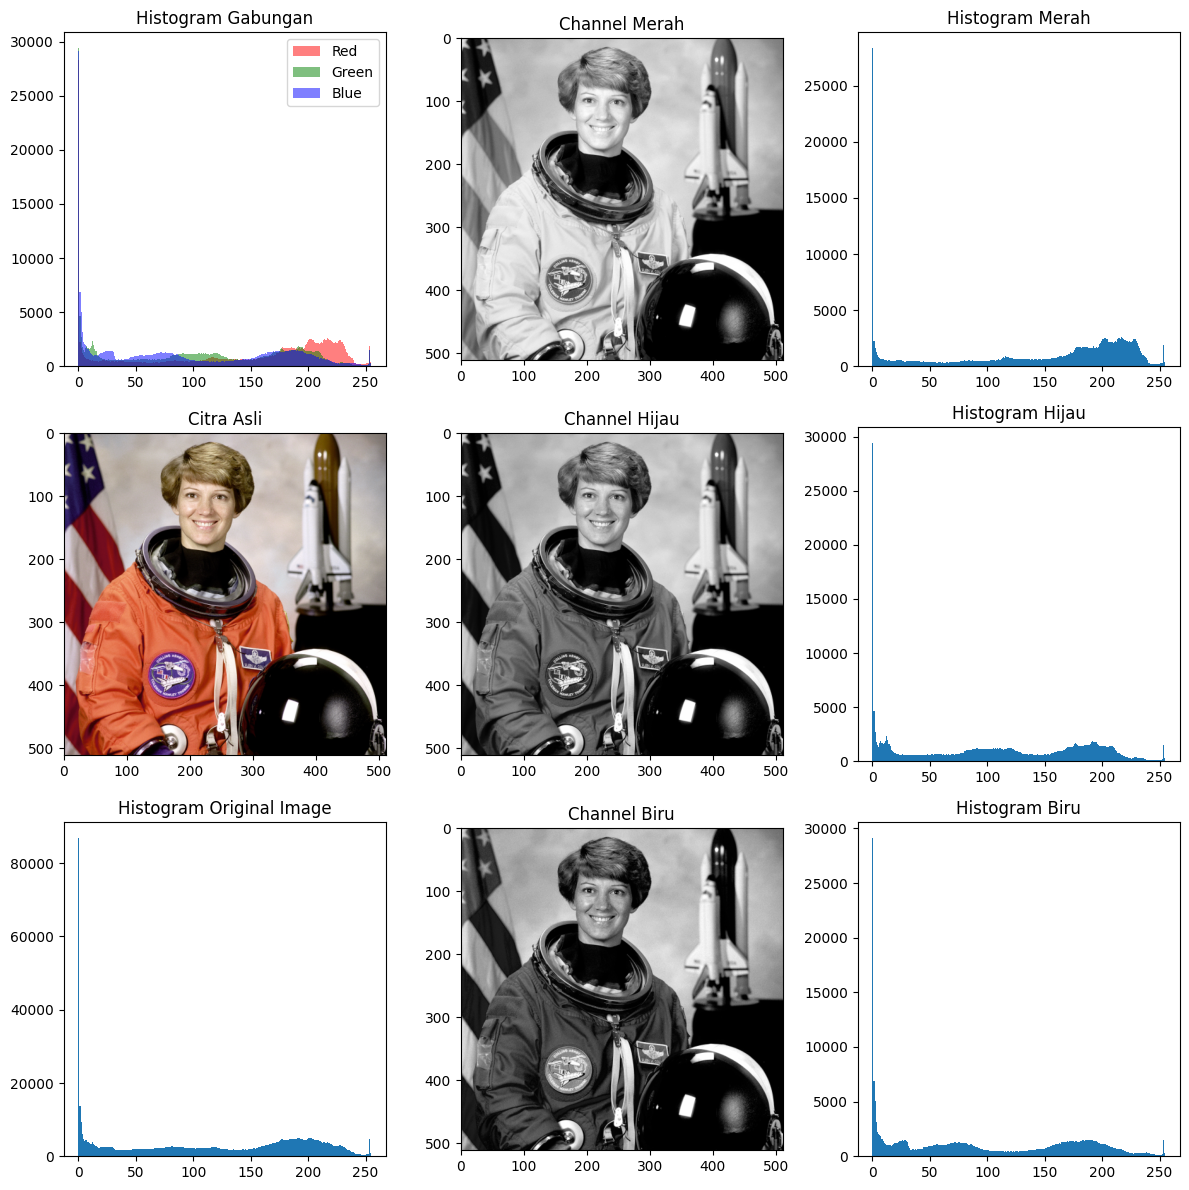

In [18]:
red = rgbImage[:, :, 0]
green = rgbImage[:, :, 1]
blue = rgbImage[:, :, 2]

print('red shape:', red.shape)
print('green shape:', green.shape)
print('blue shape:', blue.shape)

# Membuat subplot 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
ax = axes.ravel()

# Menampilkan histogram gabungan untuk ketiga channel warna di pojok kiri atas
ax[0].hist(red.ravel(), bins=256, color='red', alpha=0.5, label='Red')
ax[0].hist(green.ravel(), bins=256, color='green', alpha=0.5, label='Green')
ax[0].hist(blue.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
ax[0].set_title('Histogram Gabungan')
ax[0].legend()

# Menampilkan histogram untuk channel merah di posisi (1, 0)
ax[1].imshow(red, cmap=plt.cm.gray)
ax[1].set_title('Channel Merah')
ax[2].hist(red.ravel(), bins=256)
ax[2].set_title('Histogram Merah')

# Menampilkan citra asli
ax[3].imshow(rgbImage)
ax[3].set_title('Citra Asli')

# Menampilkan histogram untuk channel hijau di posisi (1, 1)
ax[4].imshow(green, cmap=plt.cm.gray)
ax[4].set_title('Channel Hijau')
ax[5].hist(green.ravel(), bins=256)
ax[5].set_title('Histogram Hijau')

# Menampilkan histogram untuk citra original
ax[6].hist(rgbImage.ravel(),bins=256) #Histogram gabungan RGB
ax[6].set_title('Histogram Original Image')

# Menampilkan histogram untuk channel biru di posisi (1, 2)
ax[7].imshow(blue, cmap=plt.cm.gray)
ax[7].set_title('Channel Biru')
ax[8].hist(blue.ravel(), bins=256)
ax[8].set_title('Histogram Biru')   

# Menyusun layout
fig.tight_layout()
plt.show()

# Image Enhancment

Ekualisasi Histogram

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import data

In [22]:
def getCDF(image):
    # Calculate the histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    return cdf_normalized

Text(0.5, 1.0, 'Histogram Output')

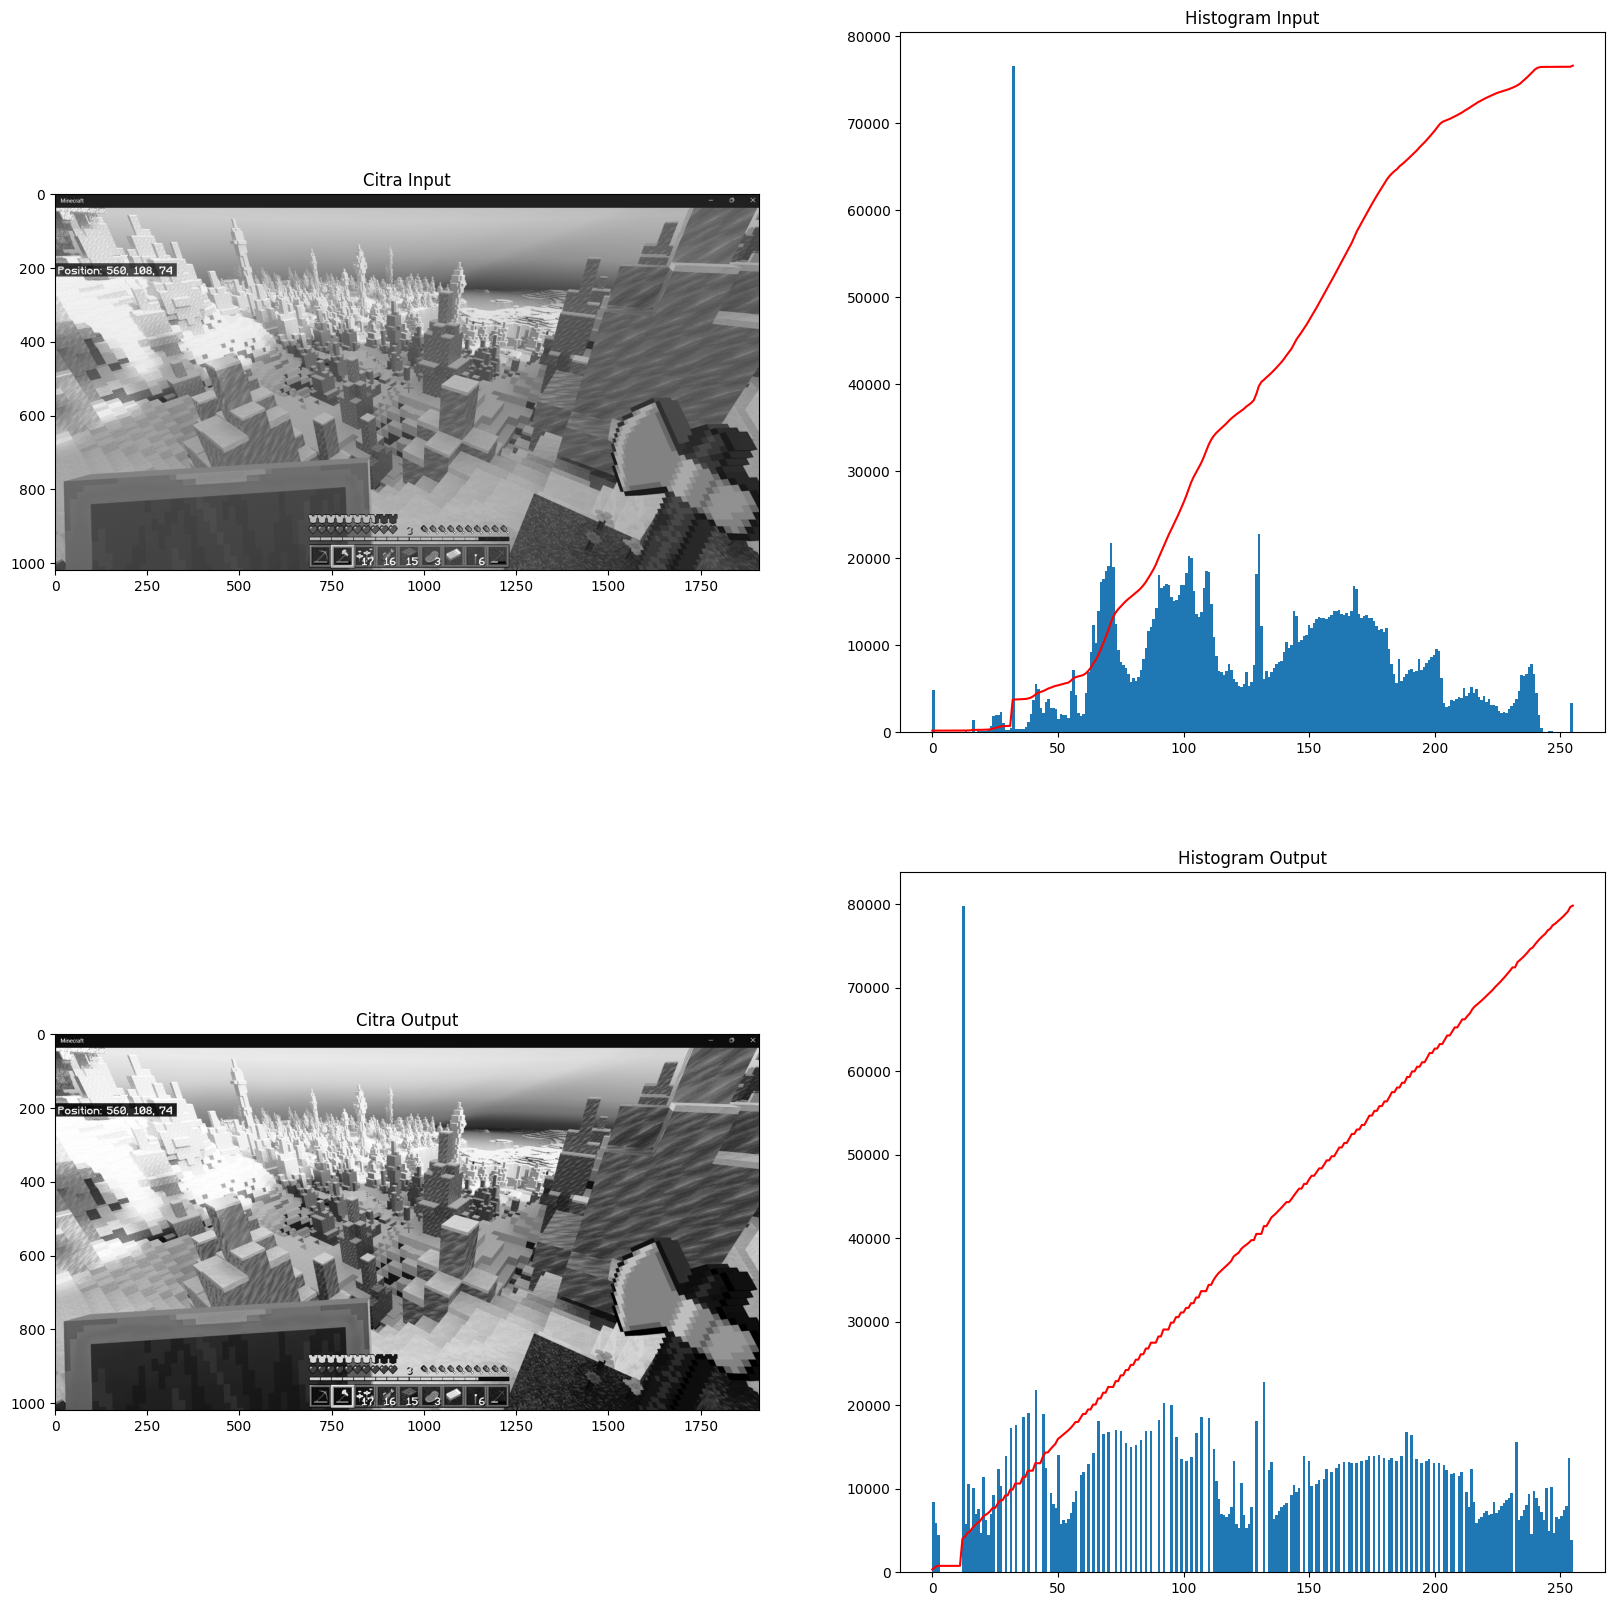

In [ ]:
citraInput = imread('spikes.png')

# Convert the image to grayscale
citraInput = cv.cvtColor(citraInput, cv.COLOR_RGBA2GRAY)

# Apply histogram equalization
citraOutput = cv.equalizeHist(citraInput)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(citraInput, cmap= 'gray')
ax[0].set_title('Citra Input')
ax[1].hist(citraInput.ravel(), bins = 256)
ax[1].plot(getCDF(citraInput), color = 'red')
ax[1].set_title('Histogram Input')

ax[2].imshow(citraOutput, cmap= 'gray')
ax[2].set_title('Citra Output')
ax[3].hist(citraOutput.ravel(), bins = 256)
ax[3].plot(getCDF(citraOutput), color = 'red')
ax[3].set_title('Histogram Output')  

Text(0.5, 1.0, 'Histogram Output')

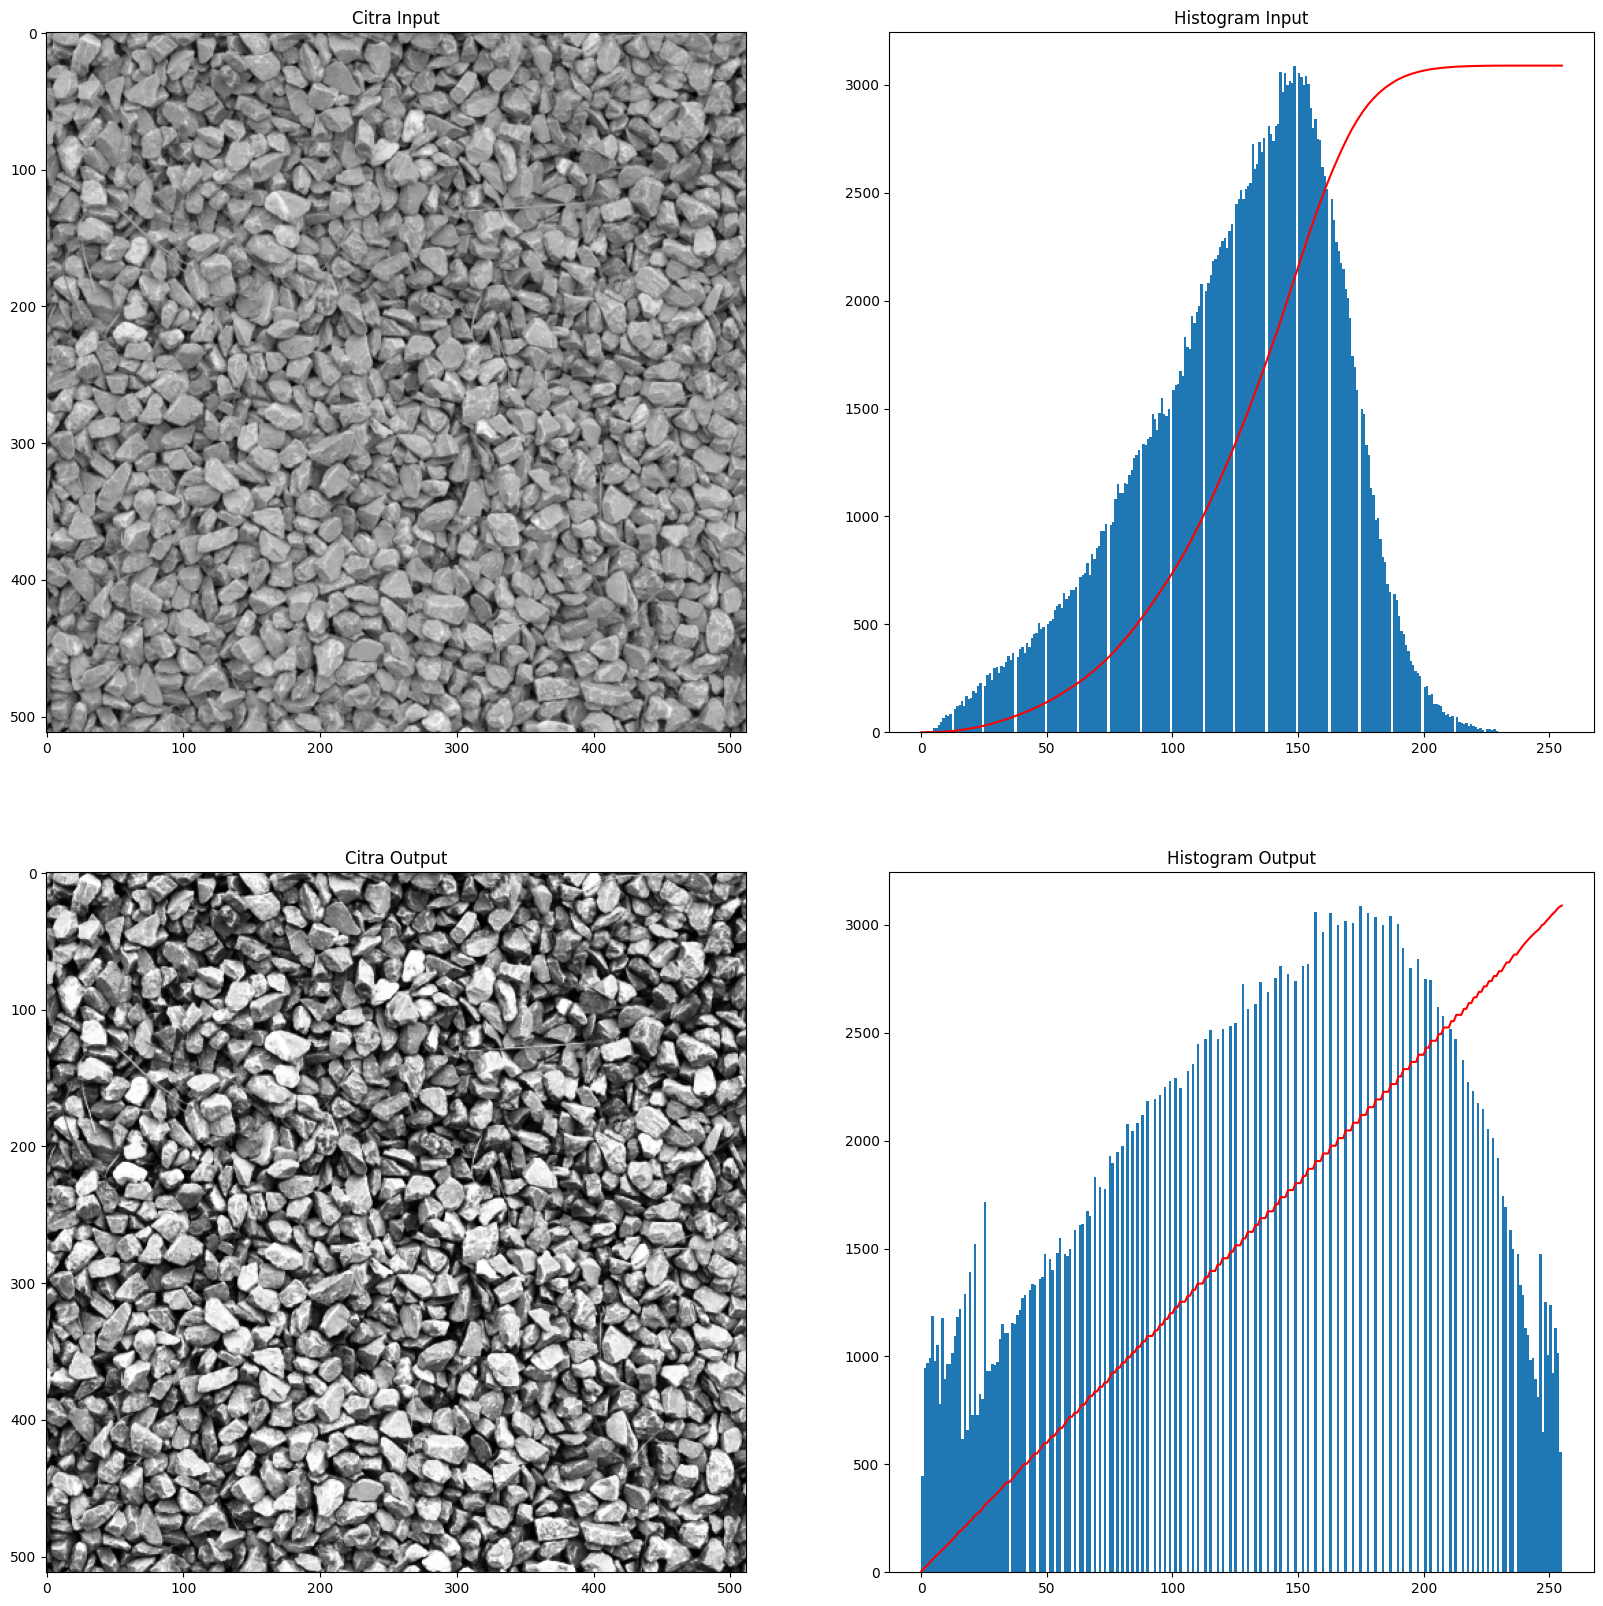

In [33]:
citraInput = data.gravel()

# Apply histogram equalization
citraOutput = cv.equalizeHist(citraInput)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(citraInput, cmap= 'gray')
ax[0].set_title('Citra Input')
ax[1].hist(citraInput.ravel(), bins = 256)
ax[1].plot(getCDF(citraInput), color = 'red')
ax[1].set_title('Histogram Input')

ax[2].imshow(citraOutput, cmap= 'gray')
ax[2].set_title('Citra Output')
ax[3].hist(citraOutput.ravel(), bins = 256)
ax[3].plot(getCDF(citraOutput), color = 'red')
ax[3].set_title('Histogram Output')  

Brightness, Contrast and Gamma Adjustments